<a href="https://colab.research.google.com/github/Lucky456F/Tamizan-Skills-Internship-ML-AI-PROJECT-4/blob/main/Project_4_Fake_News_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-learn matplotlib seaborn


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, roc_curve, auc

In [ ]:
data = {
    'text': [
        'Breaking news: COVID-19 vaccine causes side effects!',
        'NASA confirms water on the moon.',
        'Aliens landed in my backyard yesterday.',
        'Apple launches new iPhone model.',
        'Scientists discover cure for common cold.',
        'Fake news: Politician caught in scandal.',
        'Study shows coffee is good for health.',
        'Shocking! Man turns into a lizard after eating pizza.'
    ],
    'label': ['FAKE', 'REAL', 'FAKE', 'REAL', 'REAL', 'FAKE', 'REAL', 'FAKE']
}
df = pd.DataFrame(data)

In [ ]:
X = df['text']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF Vectorization (with stopword removal)
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_train = vectorizer.fit_transform(X_train)
tfidf_test = vectorizer.transform(X_test)


In [ ]:
pac = PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train, y_train)
y_pred_pac = pac.predict(tfidf_test)

# SVM Classifier
svm = LinearSVC()
svm.fit(tfidf_train, y_train)
y_pred_svm = svm.predict(tfidf_test)


In [ ]:
def evaluate_model(y_true, y_pred, model_name):
    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, pos_label='FAKE')
    print(f"{model_name} Accuracy: {acc:.2f}")
    print(f"{model_name} F1 Score: {f1:.2f}")
    print(classification_report(y_true, y_pred))
    return acc, f1

print("=== Passive Aggressive Classifier ===")
acc_pac, f1_pac = evaluate_model(y_test, y_pred_pac, "Passive Aggressive")

print("\n=== SVM Classifier ===")
acc_svm, f1_svm = evaluate_model(y_test, y_pred_svm, "SVM")

=== Passive Aggressive Classifier ===
Passive Aggressive Accuracy: 0.50
Passive Aggressive F1 Score: 0.67
              precision    recall  f1-score   support

        FAKE       0.50      1.00      0.67         1
        REAL       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2


=== SVM Classifier ===
SVM Accuracy: 1.00
SVM F1 Score: 1.00
              precision    recall  f1-score   support

        FAKE       1.00      1.00      1.00         1
        REAL       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


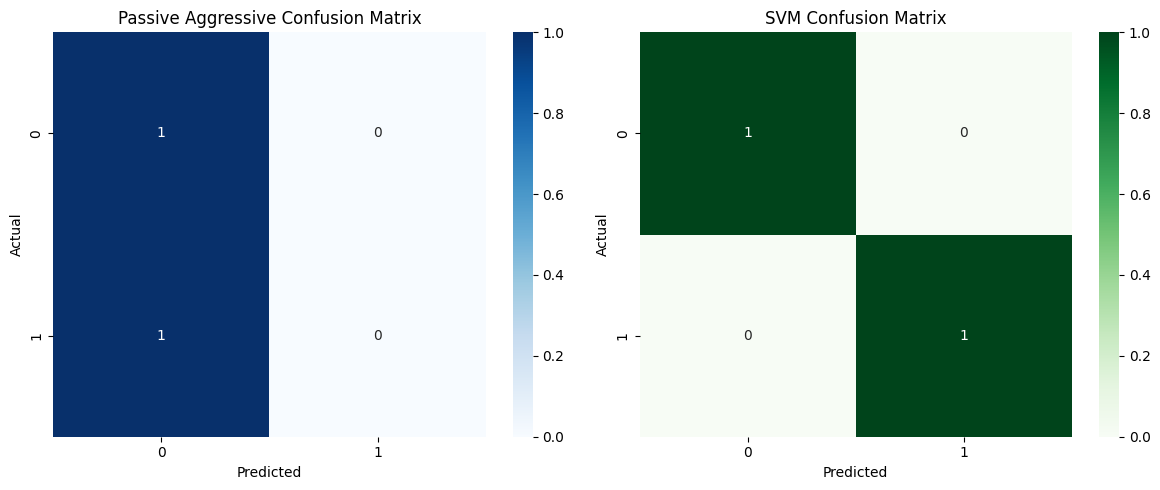

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_test, y_pred_pac), annot=True, fmt='d', cmap='Blues')
plt.title('Passive Aggressive Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Greens')
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

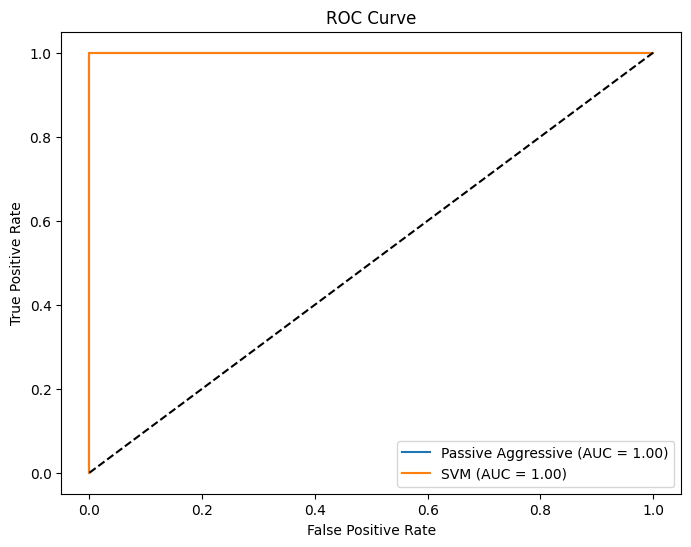

In [ ]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test).ravel()

# For Passive Aggressive, get decision function
y_score_pac = pac.decision_function(tfidf_test)
# For SVM, get decision function
y_score_svm = svm.decision_function(tfidf_test)

fpr_pac, tpr_pac, _ = roc_curve(y_test_bin, y_score_pac)
fpr_svm, tpr_svm, _ = roc_curve(y_test_bin, y_score_svm)
roc_auc_pac = auc(fpr_pac, tpr_pac)
roc_auc_svm = auc(fpr_svm, tpr_svm)

plt.figure(figsize=(8,6))
plt.plot(fpr_pac, tpr_pac, label=f'Passive Aggressive (AUC = {roc_auc_pac:.2f})')
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {roc_auc_svm:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
